### 1) Bitcoin only

The BTC price on 2023-10-26 was predicted to be $25849.40


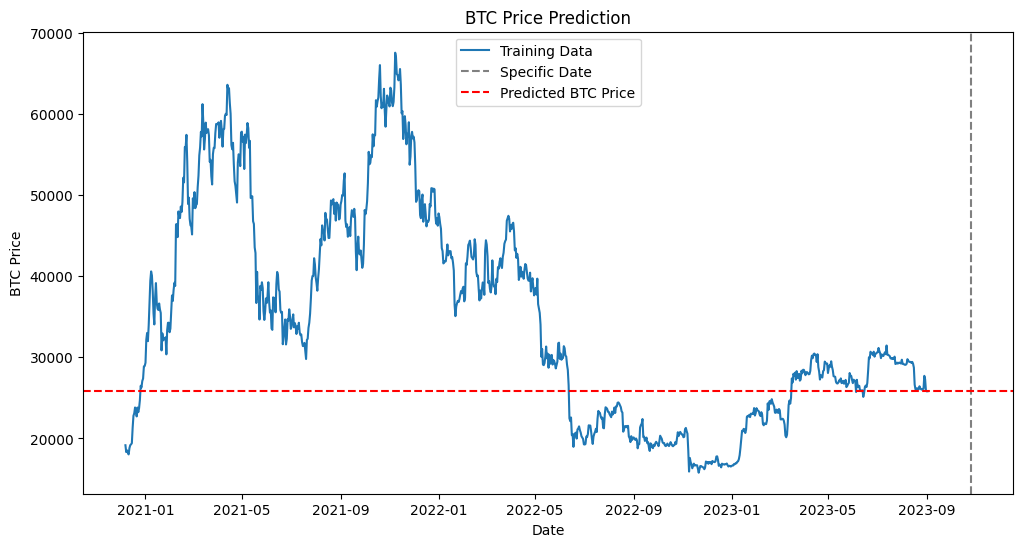

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta

# Load the Bitcoin (BTC) data
btc_data = pd.read_csv('btc_data.csv')
specific_date = "2023-10-26"

# Convert 'timestamp' to datetime
btc_data['timestamp'] = pd.to_datetime(btc_data['timestamp'], unit='ms')

# Set 'timestamp' as the index
btc_data.set_index('timestamp', inplace=True)

# Aggregate duplicate timestamps by taking the mean
btc_data = btc_data.resample('D').mean().ffill()

# Split the data into training and testing sets
train_data = btc_data[btc_data.index < specific_date]

# Define and fit the SARIMA model
# SARIMA(p, d, q)(P, D, Q, s) - Seasonal AutoRegressive Integrated Moving Average
p, d, q = 1, 1, 1  # ARIMA parameters
P, D, Q, s = 1, 1, 1, 7  # Seasonal parameters (daily data with weekly seasonality)

model = SARIMAX(train_data['close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Predict the BTC price for the specific date
predicted_price = results.get_forecast(steps=1).predicted_mean.iloc[0]

# Print the prediction
print(f"The BTC price on {specific_date} was predicted to be ${predicted_price:.2f}")

# Convert the specific date to a datetime object
specific_date_dt = datetime.strptime(specific_date, "%Y-%m-%d")

# Plot actual vs. predicted BTC prices
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['close'], label='Training Data')
plt.axvline(x=specific_date_dt, color='gray', linestyle='--', label='Specific Date')
plt.axhline(y=predicted_price, color='red', linestyle='--', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()
plt.show()

### 2) Ethereum only

The ETH price on 2023-10-26 was predicted to be $1372.37


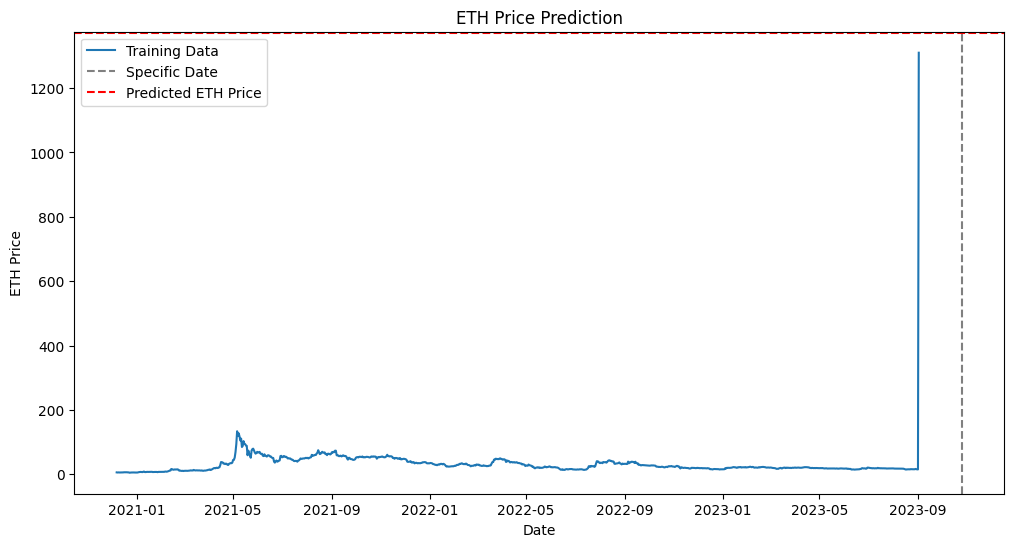

In [22]:
# Load the Ethereum (ETH) data
eth_data = pd.read_csv('etc_data.csv')  # Assuming you have a separate 'eth_data.csv' file
specific_date = "2023-10-26"

# Convert 'timestamp' to datetime
eth_data['timestamp'] = pd.to_datetime(eth_data['timestamp'], unit='ms')

# Set 'timestamp' as the index
eth_data.set_index('timestamp', inplace=True)

# Aggregate duplicate timestamps by taking the mean
eth_data = eth_data.resample('D').mean().ffill()

# Split the data into training and testing sets
train_data_eth = eth_data[eth_data.index < specific_date]

# Define and fit the SARIMA model for ETH
p, d, q = 1, 1, 1  # ARIMA parameters
P, D, Q, s = 1, 1, 1, 7  # Seasonal parameters (daily data with weekly seasonality)

model_eth = SARIMAX(train_data_eth['close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results_eth = model_eth.fit()

# Predict the ETH price for the specific date
predicted_price_eth = results_eth.get_forecast(steps=1).predicted_mean.iloc[0]
# Print the prediction for ETH
print(f"The ETH price on {specific_date} was predicted to be ${predicted_price_eth:.2f}")


specific_date_dt = datetime.strptime(specific_date, "%Y-%m-%d")

# Plot actual vs. predicted ETH prices
plt.figure(figsize=(12, 6))
plt.plot(train_data_eth.index, train_data_eth['close'], label='Training Data')
plt.axvline(x=specific_date_dt, color='gray', linestyle='--', label='Specific Date')
plt.axhline(y=predicted_price_eth, color='red', linestyle='--', label='Predicted ETH Price')
plt.title('ETH Price Prediction')
plt.xlabel('Date')
plt.ylabel('ETH Price')
plt.legend()
plt.show()


### 3) Litecoin only

The LTC price on 2023-10-26 was predicted to be $64.31


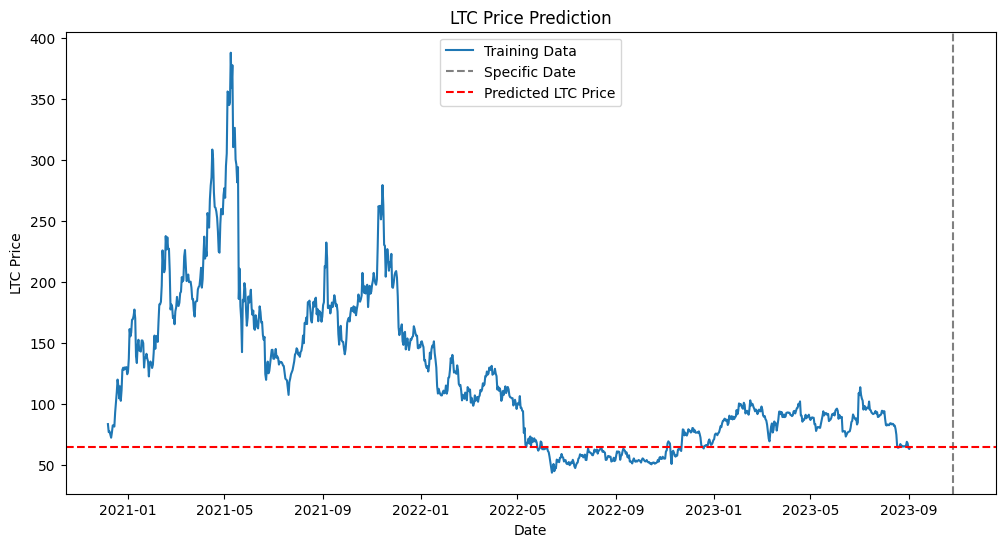

In [23]:
# Load the Litecoin (LTC) data
ltc_data = pd.read_csv('ltc_data.csv')

# Convert 'timestamp' to datetime
ltc_data['timestamp'] = pd.to_datetime(ltc_data['timestamp'], unit='ms')

# Set 'timestamp' as the index
ltc_data.set_index('timestamp', inplace=True)

# Aggregate duplicate timestamps by taking the mean
ltc_data = ltc_data.resample('D').mean().ffill()

# Split the data into training and testing sets
train_data_ltc = ltc_data[ltc_data.index < specific_date]

# Define and fit the SARIMA model for LTC
p, d, q = 1, 1, 1  # ARIMA parameters
P, D, Q, s = 1, 1, 1, 7  # Seasonal parameters (daily data with weekly seasonality)

model_ltc = SARIMAX(train_data_ltc['close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results_ltc = model_ltc.fit()

# Predict the LTC price for the specific date
predicted_price_ltc = results_ltc.get_forecast(steps=1).predicted_mean.iloc[0]

# Print the prediction for LTC
print(f"The LTC price on {specific_date} was predicted to be ${predicted_price_ltc:.2f}")

# Convert the specific date to a datetime object
specific_date_dt = datetime.strptime(specific_date, "%Y-%m-%d")

# Plot actual vs. predicted LTC prices
plt.figure(figsize=(12, 6))
plt.plot(train_data_ltc.index, train_data_ltc['close'], label='Training Data')
plt.axvline(x=specific_date_dt, color='gray', linestyle='--', label='Specific Date')
plt.axhline(y=predicted_price_ltc, color='red', linestyle='--', label='Predicted LTC Price')
plt.title('LTC Price Prediction')
plt.xlabel('Date')
plt.ylabel('LTC Price')
plt.legend()
plt.show()

### 4) All coins (Equal number of each coin)

The BTC price on 2023-10-26 was predicted to be $25849.40
The ETH price on 2023-10-26 was predicted to be $1372.37
The LTC price on 2023-10-26 was predicted to be $64.31


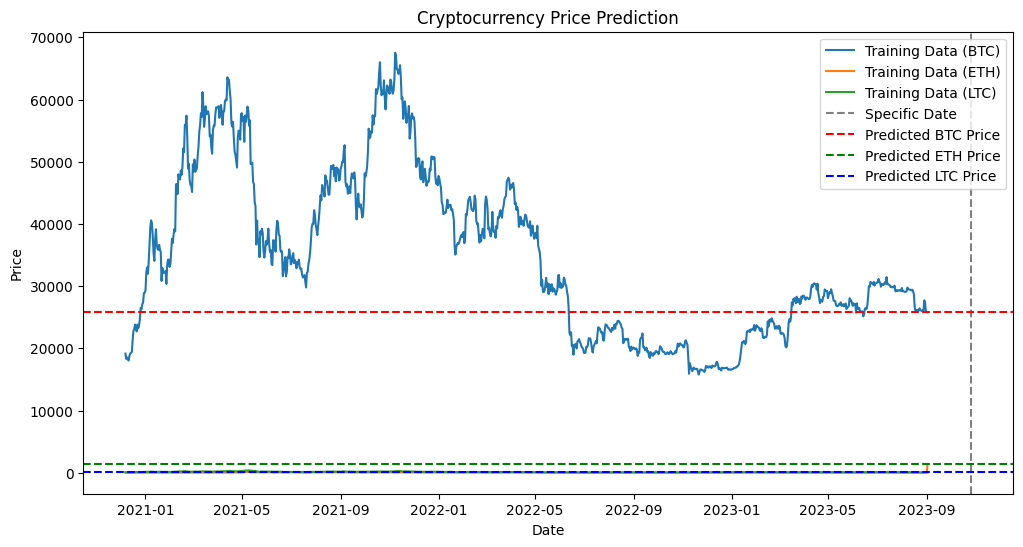

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta
import random

# Load the Bitcoin (BTC) data
btc_data = pd.read_csv('btc_data.csv')
# Load the Ethereum (ETH) data
eth_data = pd.read_csv('etc_data.csv')
# Load the Litecoin (LTC) data
ltc_data = pd.read_csv('ltc_data.csv')

# Convert 'timestamp' to datetime for all coins
btc_data['timestamp'] = pd.to_datetime(btc_data['timestamp'], unit='ms')
eth_data['timestamp'] = pd.to_datetime(eth_data['timestamp'], unit='ms')
ltc_data['timestamp'] = pd.to_datetime(ltc_data['timestamp'], unit='ms')

# Set 'timestamp' as the index for all coins
btc_data.set_index('timestamp', inplace=True)
eth_data.set_index('timestamp', inplace=True)
ltc_data.set_index('timestamp', inplace=True)

# Aggregate duplicate timestamps by taking the mean for all coins
btc_data = btc_data.resample('D').mean().ffill()
eth_data = eth_data.resample('D').mean().ffill()
ltc_data = ltc_data.resample('D').mean().ffill()

# Split the data into training and testing sets for all coins
specific_date = "2023-10-26"

train_data_btc = btc_data[btc_data.index < specific_date]
train_data_eth = eth_data[eth_data.index < specific_date]
train_data_ltc = ltc_data[ltc_data.index < specific_date]

# Define and fit the SARIMA model for BTC, ETH, and LTC
# BTC Model
p, d, q = 1, 1, 1  # ARIMA parameters
P, D, Q, s = 1, 1, 1, 7  # Seasonal parameters (daily data with weekly seasonality)
model_btc = SARIMAX(train_data_btc['close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results_btc = model_btc.fit()

# ETH Model
model_eth = SARIMAX(train_data_eth['close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results_eth = model_eth.fit()

# LTC Model
model_ltc = SARIMAX(train_data_ltc['close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results_ltc = model_ltc.fit()

# Predict the prices for the specific date for all coins
predicted_price_btc = results_btc.get_forecast(steps=1).predicted_mean.iloc[0]
predicted_price_eth = results_eth.get_forecast(steps=1).predicted_mean.iloc[0]
predicted_price_ltc = results_ltc.get_forecast(steps=1).predicted_mean.iloc[0]

# Print the predictions for all coins

print(f"The BTC price on {specific_date} was predicted to be ${predicted_price_btc:.2f}")
print(f"The ETH price on {specific_date} was predicted to be ${predicted_price_eth:.2f}")
print(f"The LTC price on {specific_date} was predicted to be ${predicted_price_ltc:.2f}")

# Plot actual vs. predicted prices for all coins
plt.figure(figsize=(12, 6))
plt.plot(train_data_btc.index, train_data_btc['close'], label='Training Data (BTC)')
plt.plot(train_data_eth.index, train_data_eth['close'], label='Training Data (ETH)')
plt.plot(train_data_ltc.index, train_data_ltc['close'], label='Training Data (LTC)')

# Convert specific_date to datetime format
specific_date_datetime = pd.to_datetime(specific_date)

plt.axvline(x=specific_date_datetime, color='gray', linestyle='--', label='Specific Date')
plt.axhline(y=predicted_price_btc, color='red', linestyle='--', label='Predicted BTC Price')
plt.axhline(y=predicted_price_eth, color='green', linestyle='--', label='Predicted ETH Price')
plt.axhline(y=predicted_price_ltc, color='blue', linestyle='--', label='Predicted LTC Price')
plt.title('Cryptocurrency Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



### All coins (Random selection of each coin)

The BTC price on 2023-10-26 00:00:00 was predicted to be $29540.60


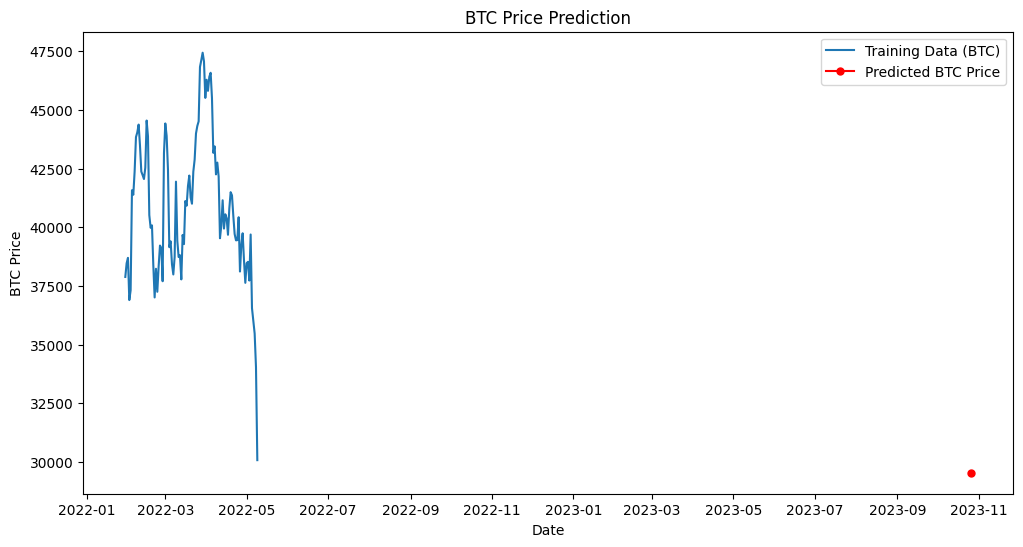

The ETH price on 2023-10-26 00:00:00 was predicted to be $47.91


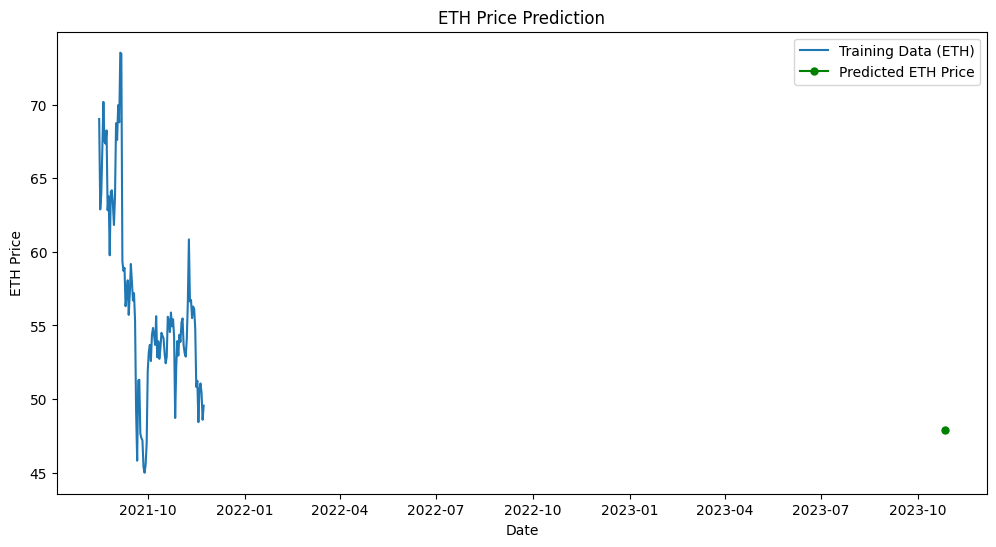

The LTC price on 2023-10-26 00:00:00 was predicted to be $62.48


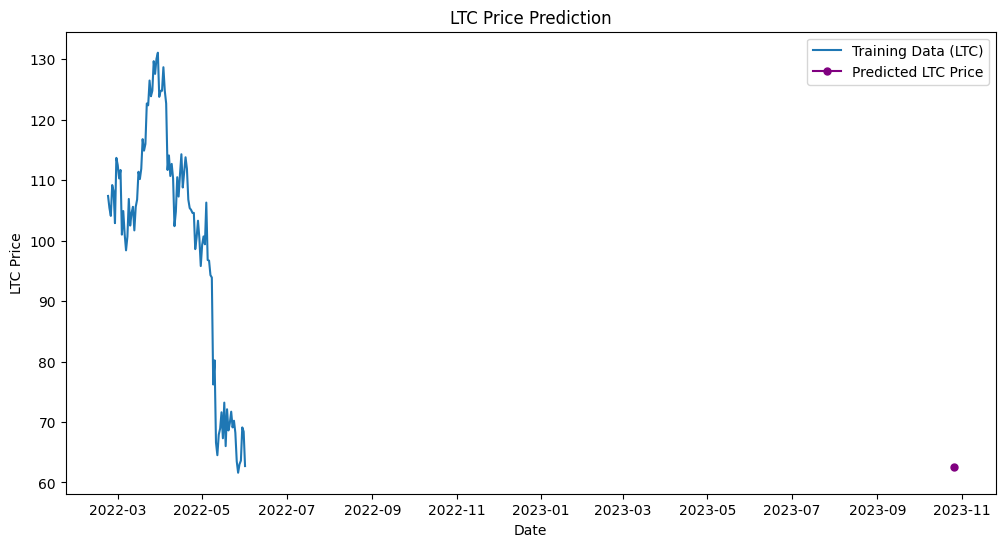

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta
import random

# Load the Bitcoin (BTC) data
btc_data = pd.read_csv('btc_data.csv')
specific_date = "2023-10-26"

# Convert 'timestamp' to datetime
btc_data['timestamp'] = pd.to_datetime(btc_data['timestamp'], unit='ms')

# Set 'timestamp' as the index
btc_data.set_index('timestamp', inplace=True)

# Aggregate duplicate timestamps by taking the mean
btc_data = btc_data.resample('D').mean().ffill()

# Load the Ethereum (ETH) data
eth_data = pd.read_csv('etc_data.csv')

# Convert 'timestamp' to datetime
eth_data['timestamp'] = pd.to_datetime(eth_data['timestamp'], unit='ms')

# Set 'timestamp' as the index
eth_data.set_index('timestamp', inplace=True)

# Aggregate duplicate timestamps by taking the mean
eth_data = eth_data.resample('D').mean().ffill()

# Load the Litecoin (LTC) data
ltc_data = pd.read_csv('ltc_data.csv')

# Convert 'timestamp' to datetime
ltc_data['timestamp'] = pd.to_datetime(ltc_data['timestamp'], unit='ms')

# Set 'timestamp' as the index
ltc_data.set_index('timestamp', inplace=True)

# Aggregate duplicate timestamps by taking the mean
ltc_data = ltc_data.resample('D').mean().ffill()

# Define and fit the SARIMA model for BTC
p, d, q = 1, 1, 1  # ARIMA parameters
P, D, Q, s = 1, 1, 1, 7  # Seasonal parameters (daily data with weekly seasonality)

# Randomly select data for training
random_start = random.randint(0, len(btc_data) - 100)
train_data_btc = btc_data.iloc[random_start:random_start + 100]

model_btc = SARIMAX(train_data_btc['close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results_btc = model_btc.fit()

# Predict the BTC price for the specific date
predicted_price_btc = results_btc.get_forecast(steps=1).predicted_mean.iloc[0]
specific_date = datetime.strptime(specific_date, "%Y-%m-%d")

# Print the prediction for BTC
print(f"The BTC price on {specific_date} was predicted to be ${predicted_price_btc:.2f}")

# Plot actual vs. predicted BTC prices
plt.figure(figsize=(12, 6))
plt.plot(train_data_btc.index, train_data_btc['close'], label='Training Data (BTC)')
plt.plot([specific_date], [predicted_price_btc], marker='o', markersize=5, color='red', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()
plt.show()

# Define and fit the SARIMA model for ETH

# Randomly select data for training
random_start = random.randint(0, len(eth_data) - 100)
train_data_eth = eth_data.iloc[random_start:random_start + 100]

model_eth = SARIMAX(train_data_eth['close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results_eth = model_eth.fit()

# Predict the ETH price for the specific date
predicted_price_eth = results_eth.get_forecast(steps=1).predicted_mean.iloc[0]


# Print the prediction for ETH
print(f"The ETH price on {specific_date} was predicted to be ${predicted_price_eth:.2f}")

# Plot actual vs. predicted ETH prices
plt.figure(figsize=(12, 6))
plt.plot(train_data_eth.index, train_data_eth['close'], label='Training Data (ETH)')
plt.plot([specific_date], [predicted_price_eth], marker='o', markersize=5, color='green', label='Predicted ETH Price')
plt.title('ETH Price Prediction')
plt.xlabel('Date')
plt.ylabel('ETH Price')
plt.legend()
plt.show()

# Define and fit the SARIMA model for LTC

# Randomly select data for training
random_start = random.randint(0, len(ltc_data) - 100)
train_data_ltc = ltc_data.iloc[random_start:random_start + 100]

model_ltc = SARIMAX(train_data_ltc['close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results_ltc = model_ltc.fit()

# Predict the LTC price for the specific date
predicted_price_ltc = results_ltc.get_forecast(steps=1).predicted_mean.iloc[0]

# Print the prediction for LTC
print(f"The LTC price on {specific_date} was predicted to be ${predicted_price_ltc:.2f}")

# Plot actual vs. predicted LTC prices
plt.figure(figsize=(12, 6))
plt.plot(train_data_ltc.index, train_data_ltc['close'], label='Training Data (LTC)')
plt.plot([specific_date], [predicted_price_ltc], marker='o', markersize=5, color='purple', label='Predicted LTC Price')
plt.title('LTC Price Prediction')
plt.xlabel('Date')
plt.ylabel('LTC Price')
plt.legend()
plt.show()
